# Classical Time Series (TS) Forecasting Cont.


## Overview

1. **Tests**
    1. Granger’s Causality Test
    2. Cointegration Test
    

2. **Classical Forecasting Methods**
    * Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
    * Vector Autoregression (VAR)
    * Vector Autoregression Moving-Average (VARMA)
    * Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
    * Simple Exponential Smoothing (SES)
    * Holt Winter’s Exponential Smoothing (HWES)

## Tests

### A. Granger’s Causality Test

Let's use Granger's Causality Test to assess if each of the TS in the system influences each other. That is if it is possible to predict the series with past values of itself along with other series in the system. And we can test this relationship before even building the model.

Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

That means that the past values of time series (X) do not cause the other series (Y). So if the p-value obtained from the test is lesser than the significance level of 0.05, then we can safely reject the null hypothesis.


### B. Cointegration Test

Cointegration test establishes the presence of a statistically significant connection between two or more time series.

When you have two or more time series and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated. (The order of integration(d) is the number of differencing required to make a non-stationary time series stationary.)

So when two or more time series are cointegrated it means they have a long run, statistically significant relationship.

### Load Basic Libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,pandas,skmultilearn -g

import os
import sys
import re
from tqdm import tqdm
import yaml
import watermark
from math import floor
from random import random
from pprint import pprint as pp
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import pandas_profiling
from pandas.plotting import register_matplotlib_converters    # for pandas_profiling

register_matplotlib_converters()                              # for pandas_profiling
sys.path.append(os.pardir)
# Set figure size
rcParams['figure.figsize'] = 20,15

from src.ts_func import *

CPython 3.7.3
IPython 7.5.0

numpy 1.16.4
pandas 0.24.2
skmultilearn unknown

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-25-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : f0f2ce613876e9193f297b7eeebb7e179a927ebc


### Constants

In [2]:
INPUT_DATA = "./data/wage_and_inflation.csv"

## Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

This is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (ex. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX by setting to zero the corresponding parameters.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# create data
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]

# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# make prediction
exog2 = [200 + random()]
predictions = model_fit.predict(len(data1), len(data1), exog=[exog2])

### Vector Autoregression (VAR)
The **VAR** method is the generalization of AR to multiple parallel time series (ex. multivariate time series). It is used when two or more time series influence each other. This method models the next step in each time series using an AR model. We refer to this model as VAR(p).

1. You need atleast two time series (variables)
2. The time series should influence each other.

The method is suitable for multivariate time series without trend and seasonal components.

The main difference with other Autoregressive models like AR, ARMA or ARIMA is that these other models are uni-directional, the predictors influence the Y and not vice-versa. Whereas Vector Auto Regression (VAR) is bi-directional, that is the variables influence each other.

The AR(p) model equation looks like this:
\begin{equation*}
Y_{t} ​​=​​\alpha ​​+​​ \beta_1​Y_{t-1} ​​+​​ \beta_2​Y_{t-2} ​​+​​...​​+​​ \beta_n​Y_{t-n}​​+​​ \epsilon_t​
\end{equation*}

In the VAR model each variable is modeled as a linear combination of past values of itself and the past values of other variables in the system. Since you have multiple time series that influence each other, it is modeled as a system of equations with one equation per variable (time series).

\begin{equation*}
Y_{1,t} ​​=​​\alpha_1 ​​+​​ \beta_{11,1}​Y_{1,t-1} ​​+​​ \beta_{12,1}​Y_{2,t-1} ​​+​​ \epsilon_{1,t}​
\end{equation*}

\begin{equation*}
Y_{2,t} ​​=​​\alpha_2 ​​+​​ \beta_{21,1}​Y_{1,t-1} ​​+​​ \beta_{22,1}​Y_{2,t-1} ​​+​​ \epsilon_{2,t}​
\end{equation*}

Where Y{1,t-1} and Y{2,t-1} are the first lag of time series Y1 and Y2 respectively.

In [4]:
from statsmodels.tsa.vector_ar.var_model import VAR

data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    
# fit model
VAR_model = VAR(data)
VAR_results = VAR_model.fit()
# make prediction
predictions = VAR_results.forecast(VAR_results.y, steps=1)
print("VAR Model Prediction: %s" % predictions)

VAR Model Prediction: [[100.08992744 100.55444408]]


In [5]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

df = pd.read_csv(INPUT_DATA, parse_dates=['date'], index_col='date')

In [6]:
df.head()

,Real GNP,Potential Real GNP,Unit labor cost,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


With:
1. gdfco : Fixed weight deflator for personal consumption expenditure excluding food and energy.
2. gdf   : Fixed weight GNP deflator.
3. gdfim : Fixed weight import deflator.
4. gdfcf : Fixed weight deflator for food in personal consumption expenditure.
5. gdfce : Fixed weight deflator for energy in personal consumption expenditure.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 1959-01-01 to 1989-07-01
Data columns (total 8 columns):
Real GNP              123 non-null float64
Potential Real GNP    123 non-null float64
Unit labor cost       123 non-null float64
gdfco                 123 non-null float64
gdf                   123 non-null float64
gdfim                 123 non-null float64
gdfcf                 123 non-null float64
gdfce                 123 non-null float64
dtypes: float64(8)
memory usage: 8.6 KB


In [8]:
df.describe()

,Real GNP,Potential Real GNP,Unit labor cost,gdfco,gdf,gdfim,gdfcf,gdfce
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.00000
mean,2747.097561,2758.462602,98.286992,69.460163,68.497561,59.397561,66.262602,52.90813
std,702.442330,735.028679,47.743734,31.724996,30.188260,31.086507,31.640044,31.60064
min,1606.400000,1608.300000,47.500000,36.900000,37.400000,26.600000,32.200000,23.10000
25%,2223.750000,2095.150000,53.400000,41.000000,41.350000,29.250000,37.000000,24.95000
50%,2734.000000,2743.400000,81.500000,56.100000,56.400000,53.700000,58.500000,40.20000
75%,3213.200000,3388.000000,151.250000,97.250000,97.550000,95.750000,98.250000,91.15000
max,4162.900000,4068.400000,187.400000,137.200000,130.200000,111.100000,129.900000,104.50000


### TS Plot

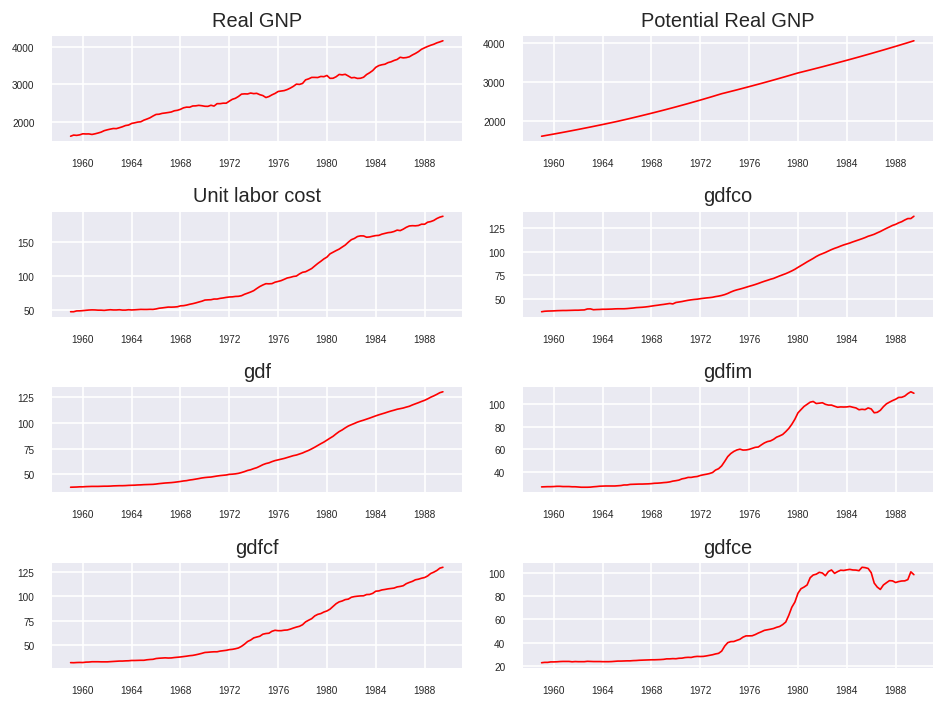

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

The series have a fairly similar trend patterns over the years except for gdfce and gdfim, where a different pattern is noticed starting in 1980.

### ***Granger’s Causality Test***

In [10]:
grangers_causation_matrix(df, variables = df.columns, test = 'ssr_chi2test') 

,Real GNP_x,Potential Real GNP_x,Unit labor cost_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
Real GNP_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
Potential Real GNP_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Unit labor cost_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


For example if we take the value 0.0212 in (row 1, column 4), it refers to the p-value of gdfco_x causing Real GNP_y. Any given p-value where significance level is <0.05, then the corresponding X series (column) causes the Y (row), so we can reject the null hypothesis and conclude that there is causality.

### ***Cointegration Test***

In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

repl = {'Real GNP': 'R_GNP', 
        'Potential Real GNP': 'PR_GNP', 
        'Unit labor cost': 'ulc'}

df.columns = [k if (k not in repl.keys()) else repl[k] for k in df.columns]
cointegration_test(df, verbose=False)

,Test Stat,> C(95%),Significance
Name,,,
R_GNP,247.995468,143.6691,True
PR_GNP,183.117145,111.7797,True
ulc,130.014024,83.9383,True
gdfco,85.284827,60.0627,True
gdf,55.052297,40.1749,True
gdfim,31.588830,24.2761,True
gdfcf,14.057177,12.3212,True
gdfce,0.451320,4.1296,False


Split the data:

In [12]:
keep = 5
df_train, df_test = df[0:-keep], df[-keep:]

# Check size
print("Shape of train set: {}".format(df_train.shape))  # (118, 8)
print("Shape of test  set: {}".format(df_test.shape))   # (5, 8)

Shape of train set: (118, 8)
Shape of test  set: (5, 8)


#### Check for Stationarity and make TS Stationary

As from the previous notebook we have some tests that can help:
* Augmented Dickey-Fuller Test (ADF Test)
* KPSS test
* Philip-Perron test

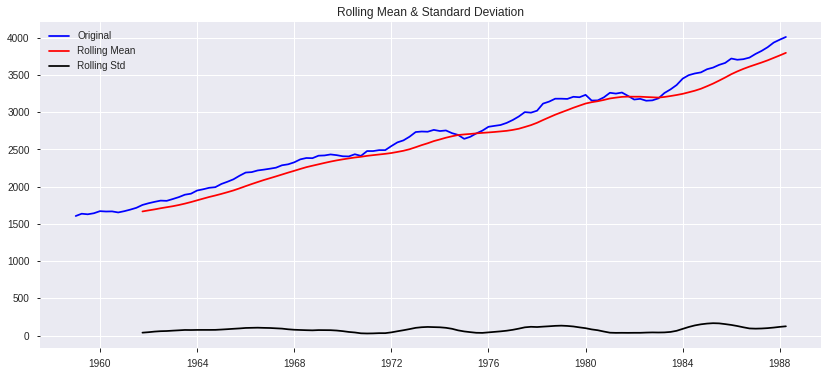

    Augmented Dickey-Fuller Test on "R_GNP" 
 -----------------------------------------------
Test Statistic                   0.519943
p-value                          0.985467
#Lags Used                       2.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
Significance Level: 0.05
 => P-Value = 0.9855. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




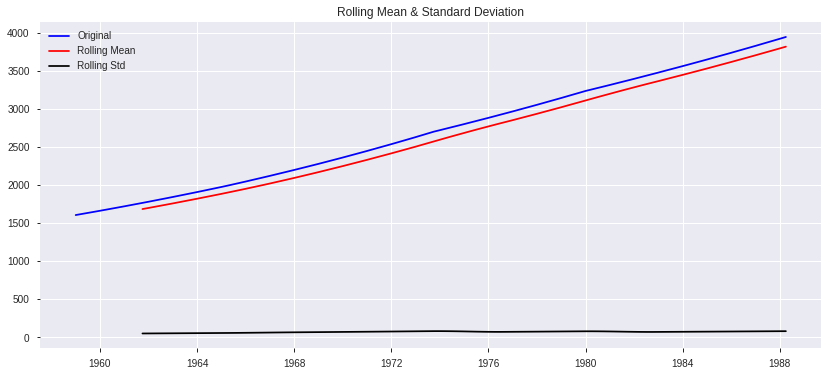

    Augmented Dickey-Fuller Test on "PR_GNP" 
 -----------------------------------------------
Test Statistic                   1.109759
p-value                          0.995299
#Lags Used                       1.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64
Significance Level: 0.05
 => P-Value = 0.9953. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




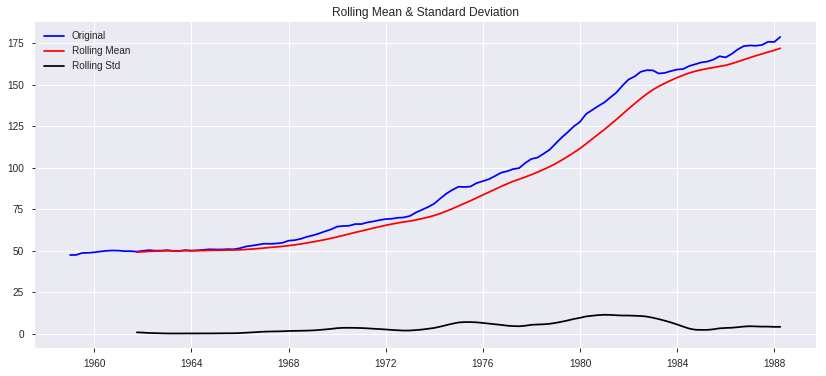

    Augmented Dickey-Fuller Test on "ulc" 
 -----------------------------------------------
Test Statistic                   1.448760
p-value                          0.997325
#Lags Used                       2.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
Significance Level: 0.05
 => P-Value = 0.9973. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




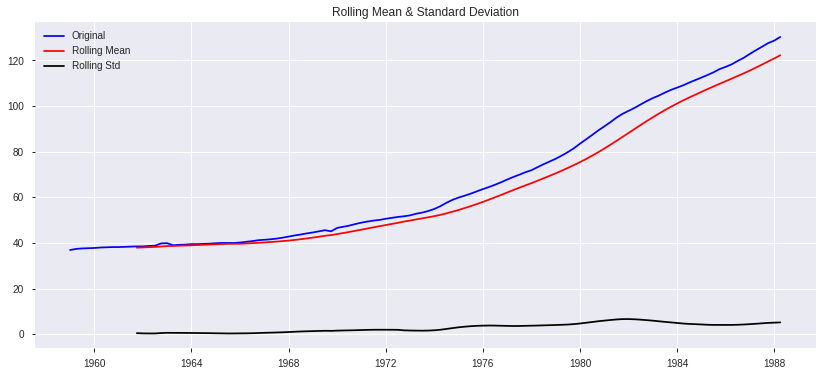

    Augmented Dickey-Fuller Test on "gdfco" 
 -----------------------------------------------
Test Statistic                   1.402999
p-value                          0.997128
#Lags Used                       3.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64
Significance Level: 0.05
 => P-Value = 0.9971. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




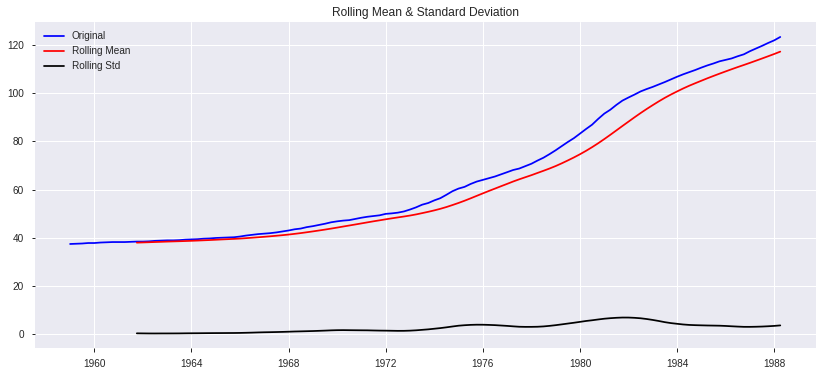

    Augmented Dickey-Fuller Test on "gdf" 
 -----------------------------------------------
Test Statistic                   0.573257
p-value                          0.986938
#Lags Used                       3.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64
Significance Level: 0.05
 => P-Value = 0.9869. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




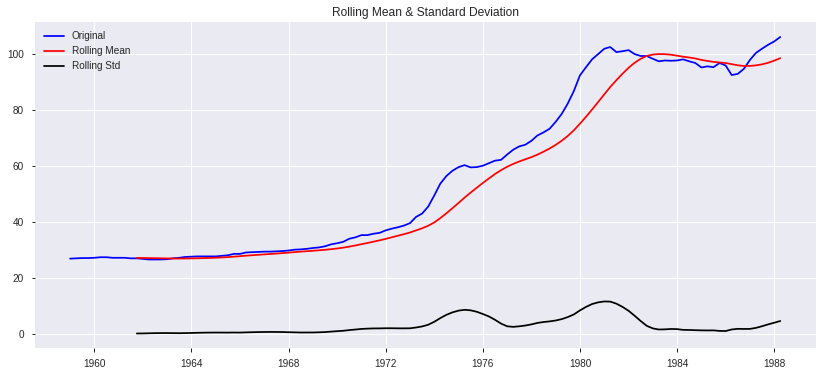

    Augmented Dickey-Fuller Test on "gdfim" 
 -----------------------------------------------
Test Statistic                   0.129311
p-value                          0.968006
#Lags Used                       1.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64
Significance Level: 0.05
 => P-Value = 0.968. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




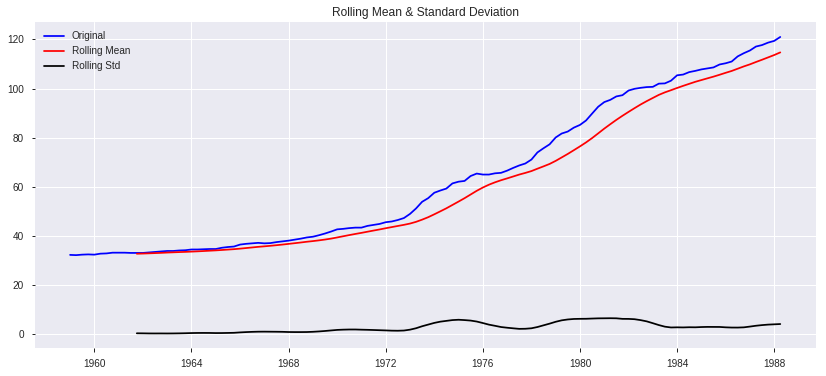

    Augmented Dickey-Fuller Test on "gdfcf" 
 -----------------------------------------------
Test Statistic                   1.169635
p-value                          0.995769
#Lags Used                       8.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
Significance Level: 0.05
 => P-Value = 0.9958. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




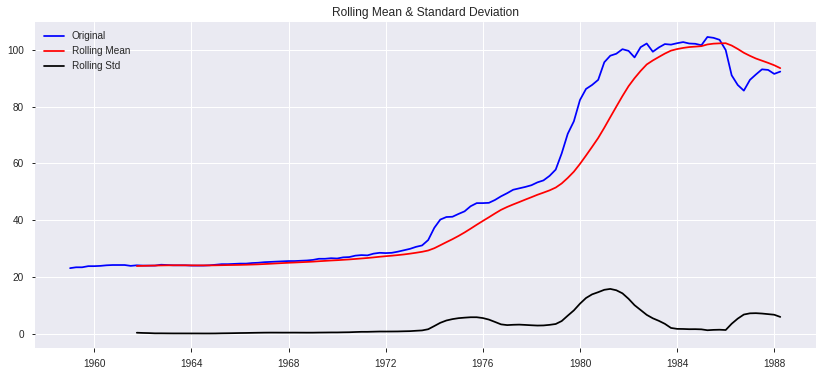

    Augmented Dickey-Fuller Test on "gdfce" 
 -----------------------------------------------
Test Statistic                  -0.181058
p-value                          0.940742
#Lags Used                       8.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
Significance Level: 0.05
 => P-Value = 0.9407. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [13]:
# Apply the Stationarity Test in all the columns of data:
for name, column in df_train.items():
    test_stationarity(column, name=name)
    print('\n')

At this point none of the series is Stationary.

As seem in the previous notebook, one way of making the series stationery is differentiation.

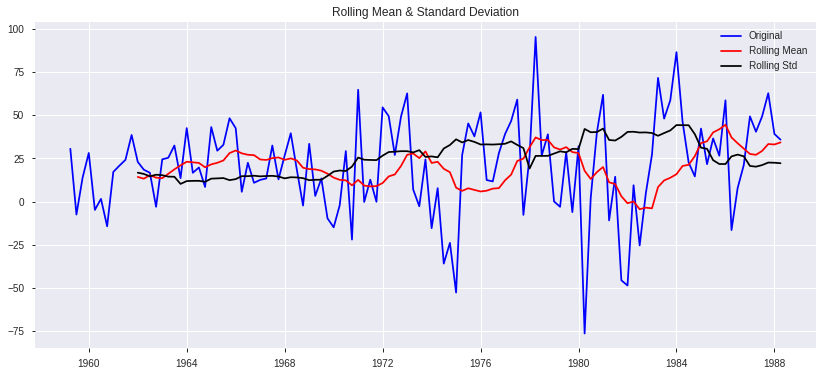

    Augmented Dickey-Fuller Test on "R_GNP" 
 -----------------------------------------------
Test Statistic                  -5.319691
p-value                          0.000005
#Lags Used                       1.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




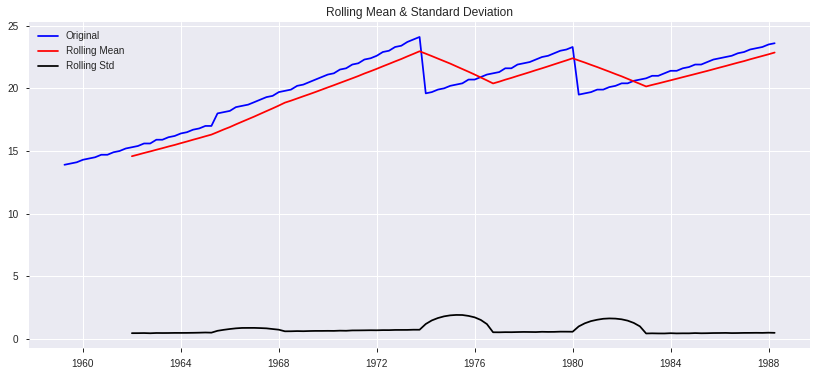

    Augmented Dickey-Fuller Test on "PR_GNP" 
 -----------------------------------------------
Test Statistic                  -1.860187
p-value                          0.351016
#Lags Used                       0.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64
Significance Level: 0.05
 => P-Value = 0.351. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




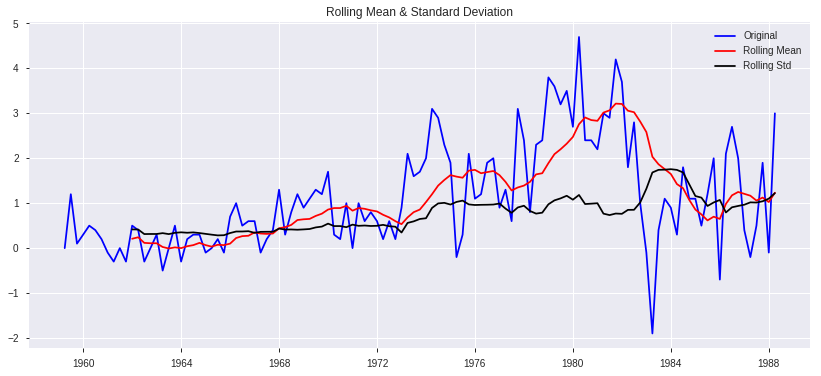

    Augmented Dickey-Fuller Test on "ulc" 
 -----------------------------------------------
Test Statistic                  -3.436889
p-value                          0.009764
#Lags Used                       1.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0098. Rejecting Null Hypothesis.
 => Series is Stationary.




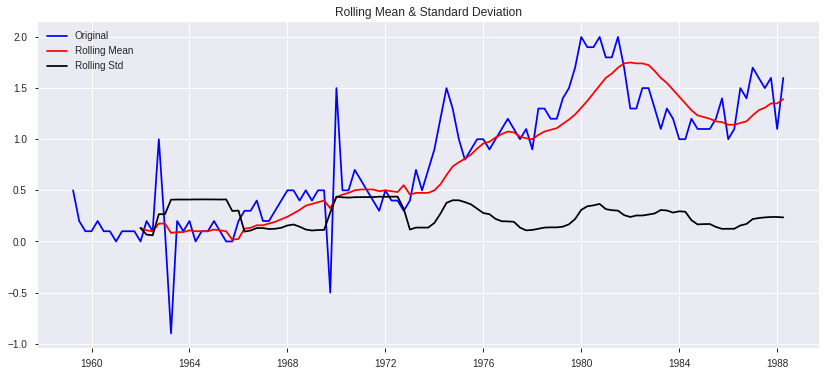

    Augmented Dickey-Fuller Test on "gdfco" 
 -----------------------------------------------
Test Statistic                  -1.335566
p-value                          0.612748
#Lags Used                       2.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64
Significance Level: 0.05
 => P-Value = 0.6127. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




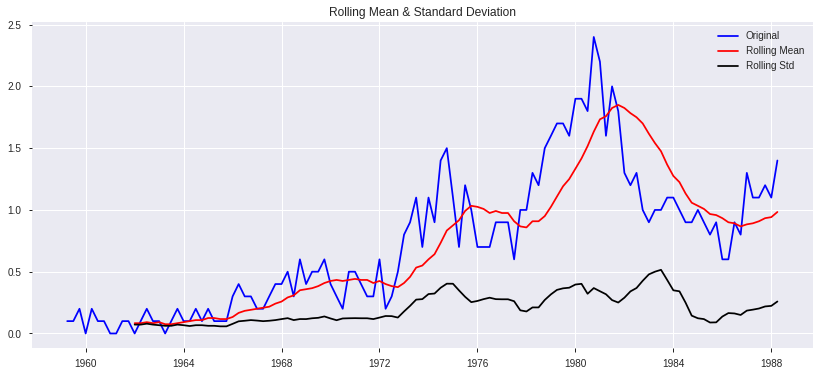

    Augmented Dickey-Fuller Test on "gdf" 
 -----------------------------------------------
Test Statistic                  -1.260660
p-value                          0.646973
#Lags Used                       2.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64
Significance Level: 0.05
 => P-Value = 0.647. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




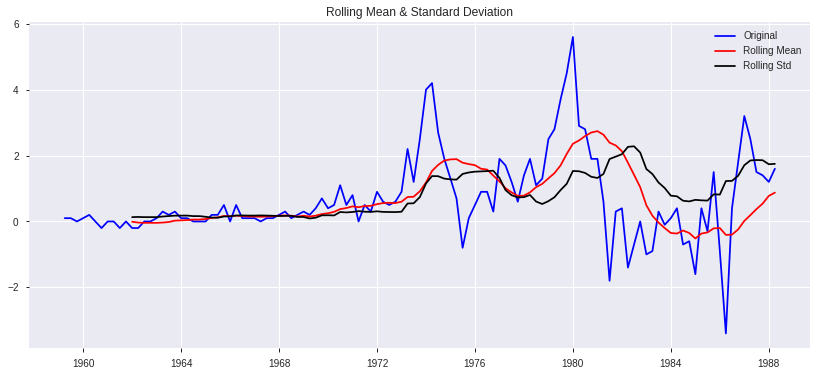

    Augmented Dickey-Fuller Test on "gdfim" 
 -----------------------------------------------
Test Statistic                  -4.038039
p-value                          0.001224
#Lags Used                       0.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0012. Rejecting Null Hypothesis.
 => Series is Stationary.




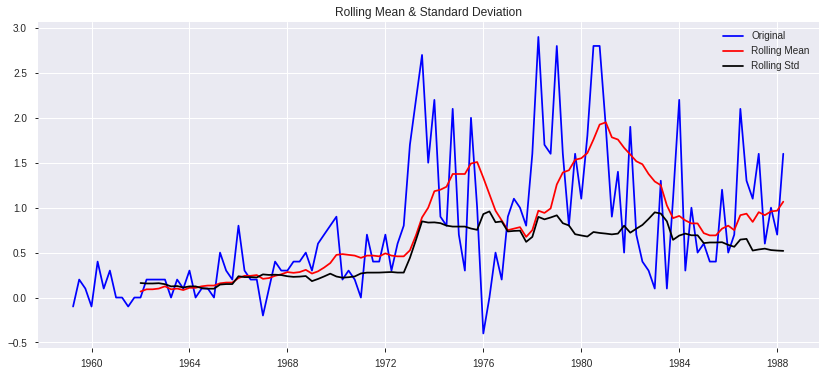

    Augmented Dickey-Fuller Test on "gdfcf" 
 -----------------------------------------------
Test Statistic                  -2.266124
p-value                          0.183126
#Lags Used                       7.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
Significance Level: 0.05
 => P-Value = 0.1831. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




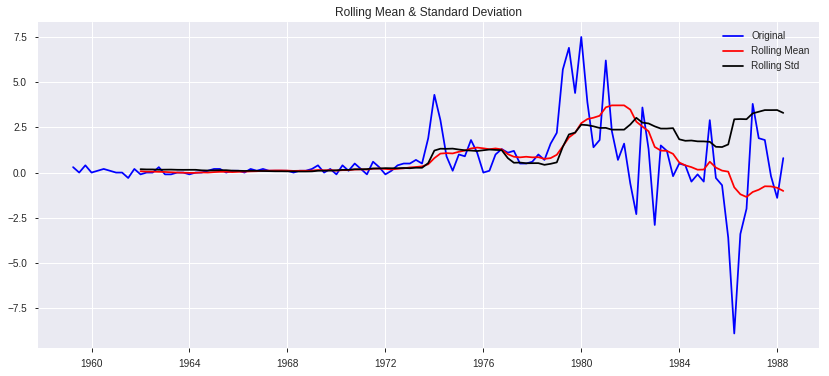

    Augmented Dickey-Fuller Test on "gdfce" 
 -----------------------------------------------
Test Statistic                  -3.195355
p-value                          0.020255
#Lags Used                       7.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0203. Rejecting Null Hypothesis.
 => Series is Stationary.




In [14]:
# Apply 1st difference
df_differenced = df_train.diff().dropna()

# And test again
for name, column in df_differenced.items():
    test_stationarity(column, name=name)
    print('\n')

We still have some of the series Non-Stationary:
- PR_GNP (Potential Real GNP)
- gdfco (Fixed weight deflator for personal consumption expenditure excluding food and energy)
- gdf (Fixed weight GNP deflator)
- gdfcf (Fixed weight deflator for food in personal consumption expenditure)

As all of the series in the VAR model should have the same number of observations, we are left with one of two choices. Either proceed with 1st differenced series or difference all the series again.

In [15]:
df_differenced = df_differenced.diff().dropna()

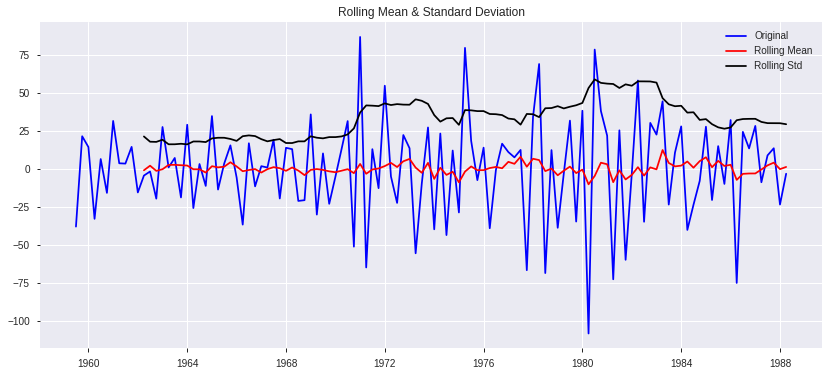

    Augmented Dickey-Fuller Test on "R_GNP" 
 -----------------------------------------------
Test Statistic                -8.980384e+00
p-value                        7.337329e-15
#Lags Used                     2.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




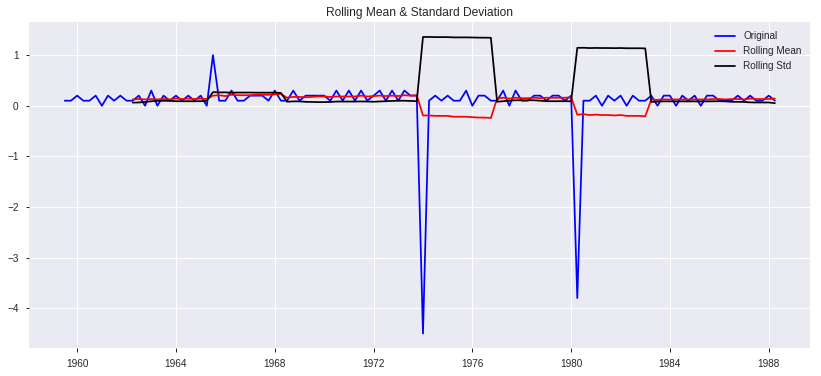

    Augmented Dickey-Fuller Test on "PR_GNP" 
 -----------------------------------------------
Test Statistic                -1.093547e+01
p-value                        9.584977e-20
#Lags Used                     0.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




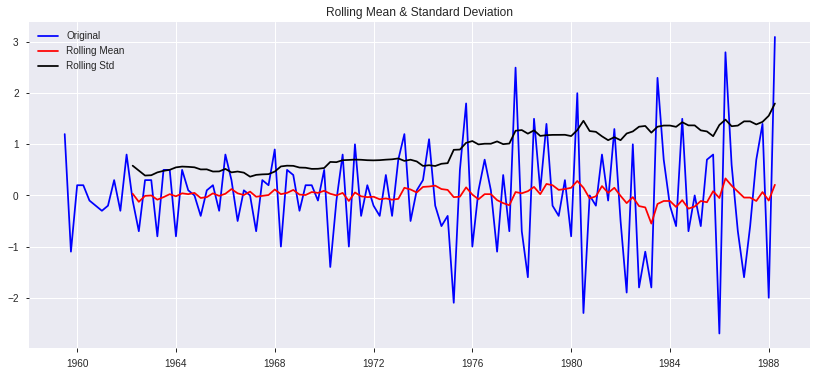

    Augmented Dickey-Fuller Test on "ulc" 
 -----------------------------------------------
Test Statistic                -8.494763e+00
p-value                        1.284771e-13
#Lags Used                     2.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




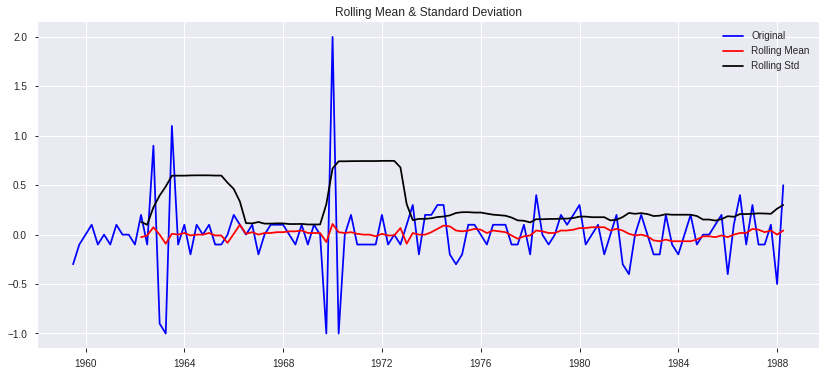

    Augmented Dickey-Fuller Test on "gdfco" 
 -----------------------------------------------
Test Statistic                -7.973642e+00
p-value                        2.738914e-12
#Lags Used                     3.000000e+00
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




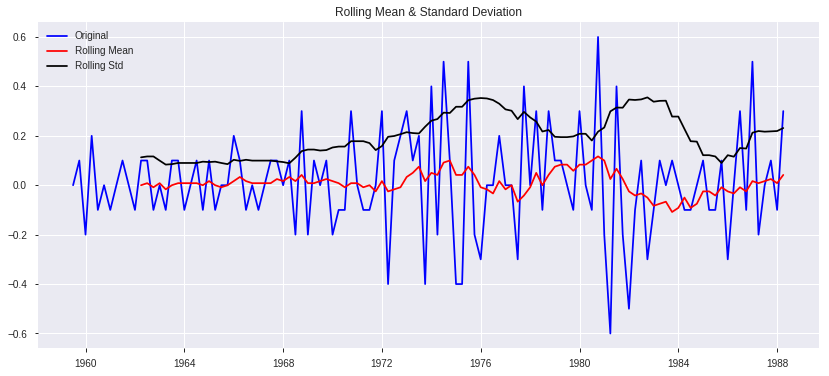

    Augmented Dickey-Fuller Test on "gdf" 
 -----------------------------------------------
Test Statistic                -1.013790e+01
p-value                        8.572434e-18
#Lags Used                     1.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




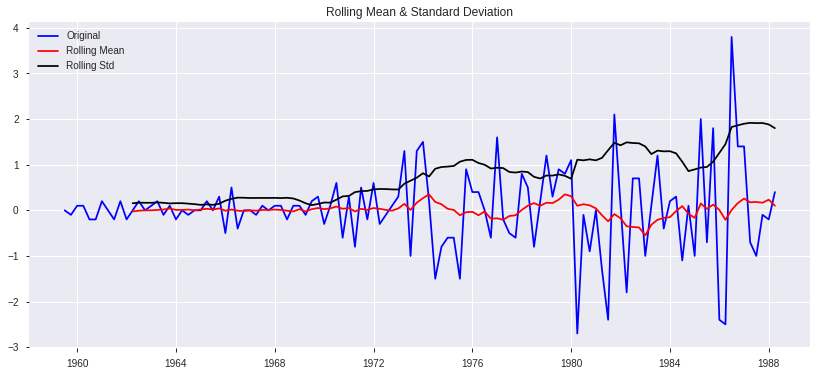

    Augmented Dickey-Fuller Test on "gdfim" 
 -----------------------------------------------
Test Statistic                -9.453011e+00
p-value                        4.562708e-16
#Lags Used                     1.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




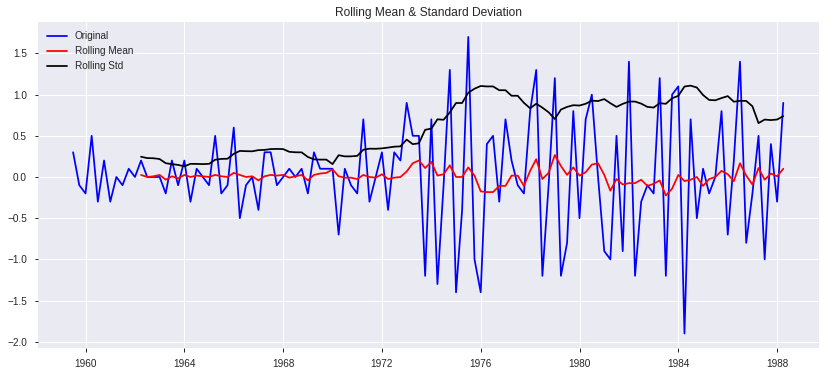

    Augmented Dickey-Fuller Test on "gdfcf" 
 -----------------------------------------------
Test Statistic                  -4.770681
p-value                          0.000062
#Lags Used                      12.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.




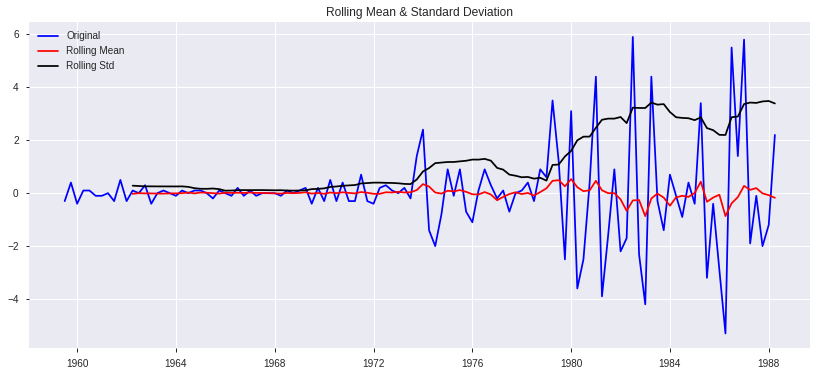

    Augmented Dickey-Fuller Test on "gdfce" 
 -----------------------------------------------
Test Statistic                  -4.939149
p-value                          0.000029
#Lags Used                       8.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
Significance Level: 0.05
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [16]:
for name, column in df_differenced.items():
    test_stationarity(column, name=column.name)
    print('\n')

Now all the series are stationary.


### ***Preparing the Model***

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

In [17]:
df_differenced.index = pd.DatetimeIndex(df_differenced.index.values, freq=df_differenced.index.inferred_freq)

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -1.4920381492464851
BIC :  0.22652805285920152
FPE :  0.22549161825159322
HQIC:  -0.7944807018397742 

Lag Order = 2
AIC :  -1.739564693927472
BIC :  1.5246720515256111
FPE :  0.17877292593986238
HQIC:  -0.41479394587965146 

Lag Order = 3
AIC :  -1.8701902121920142
BIC :  2.957044865174961
FPE :  0.16354317510083782
HQIC:  0.0886515285257321 

Lag Order = 4
AIC :  -2.123091194709856
BIC :  4.284799001914295
FPE :  0.1381949666101552
HQIC:  0.47679359642394914 

Lag Order = 5
AIC :  -2.0991294531172144
BIC :  5.907410240850762
FPE :  0.16431710801811425
HQIC:  1.1488870488612797 

Lag Order = 6
AIC :  -2.470760256281247
BIC :  7.152769774542637
FPE :  0.14459908758828188
HQIC:  1.4325954877297598 

Lag Order = 7
AIC :  -2.8185385189540995
BIC :  8.44067830945406
FPE :  0.1496346776519675
HQIC:  1.7474851665778601 

Lag Order = 8
AIC :  -3.5803195052843666
BIC :  9.333645662350767
FPE :  0.12578045600194254
HQIC:  1.6558243146160763 

Lag Order = 9
AIC :  -5.1542707

In the above output, the AIC drops to lowest at lag 4, then increases at lag 5 and then continuously drops further.
We can proceed with lag 4 model.

An alternate method to choose the order(p) of the VAR models is to use the ***model.select_order(maxlags)*** method.

In [18]:
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,-0.2665,-0.06547*,0.7661,-0.1850
1,-0.8523,0.9568,0.4278,-0.1191
2,-1.115,2.302,0.3353,0.2699
3,-1.300,3.726,0.2931,0.7371
4,-1.564,5.069,0.2483,1.124
5,-1.575,6.667,0.2908,1.766
6,-2.071,7.779,0.2313,1.921
7,-2.565,8.893,0.2115,2.079
8,-3.451,9.615,0.1592,1.845
9,-5.178,9.496,0.06923,0.7690


Note that the observed AIC and BIC values differ when using result.aic versus as seen using model.select_order()...


### ***Train VAR(p)***

VAR(4) in this case


In [19]:
VAR_fitted = model.fit(4)
VAR_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 21, Aug, 2019
Time:                     00:52:59
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    4.28480
Nobs:                     112.000    HQIC:                  0.476794
Log likelihood:          -888.476    FPE:                   0.138195
AIC:                     -2.12309    Det(Omega_mle):       0.0175103
--------------------------------------------------------------------
Results for equation R_GNP
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             2.161500         2.695370            0.802           0.423
L1.R_GNP         -0.779222         0.162228           -4.803           0.000
L1.PR_GNP         0.453237         4.978336            0.091           0.927

In [20]:
# Durbin Watson Statistic Test on each column
durbin_watson_statistic(VAR_fitted, columns=df.columns);

R_GNP  : 2.099
PR_GNP : 1.993
ulc    : 2.158
gdfco  : 2.065
gdf    : 2.243
gdfim  : 2.039
gdfcf  : 2.182
gdfce  : 2.187


### ***Forecast VAR model using statsmodels***

The VAR model expects up to the lag order number of observations from the past data.

This is because the terms in the VAR model are essentially the lags of the various TS in the dataset, so you need to provide it as many of the previous values as indicated by the lag order used by the model.

In [21]:
lag_order = VAR_fitted.k_ar
print(f"Lag Order: {lag_order}")

forecast_input = df_differenced.values[-lag_order:]
print(f"Forecast Input: \n{forecast_input}")

Lag Order: 4
Forecast Input: 
[[  8.8   0.1   0.7  -0.1   0.   -1.   -1.   -0.1]
 [ 13.5   0.1   1.4   0.1   0.1  -0.1   0.4  -2. ]
 [-23.6   0.2  -2.   -0.5  -0.1  -0.2  -0.3  -1.2]
 [ -3.3   0.1   3.1   0.5   0.3   0.4   0.9   2.2]]


Forecasting....

In [22]:
fc = VAR_fitted.forecast(y=forecast_input, steps=keep)
df_forecast = pd.DataFrame(fc, index=df.index[-keep:], columns=df.columns + '_2d')
df_forecast

,R_GNP_2d,PR_GNP_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
date,,,,,,,,
1988-07-01,-33.577118,-0.365575,-0.679759,-0.058150,-0.185540,1.459217,-0.477752,1.545057
1988-10-01,55.238624,0.303296,-0.959591,0.013215,0.056871,-1.167934,-0.310860,-1.426169
1989-01-01,-38.289922,-0.035835,0.158207,0.160481,0.202087,0.867828,0.394793,1.582040
1989-04-01,12.897163,0.004672,0.168775,-0.062597,-0.233365,-0.145314,-0.470711,-1.009513
1989-07-01,-4.786649,-0.180504,-0.006582,-0.100922,-0.002986,-0.748176,-0.048255,-1.528879


The forecasts are generated but it is on the scale of the training data used by the model. So to bring it back up to its original scale, we need to de-difference it as many times we had differenced the original input data (in this case two times).

In [23]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [26]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        

df_results.loc[:, ['R_GNP_forecast', 'PR_GNP_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

,R_GNP_forecast,PR_GNP_forecast,ulc_forecast,gdfco_forecast,gdf_forecast,gdfim_forecast,gdfcf_forecast,gdfce_forecast
date,,,,,,,,
1988-07-01,4013.022882,3971.334425,181.020241,131.841850,124.514460,109.159217,122.122248,94.645057
1988-10-01,4070.584388,3994.872147,182.380891,133.396916,125.785790,111.050499,122.933636,95.563945
1989-01-01,4089.855973,4018.374034,183.899747,135.112463,127.259208,113.809610,124.139817,98.064873
1989-04-01,4122.024720,4041.880594,185.587379,136.765412,128.499261,116.423406,124.875286,99.556287
1989-07-01,4149.406818,4065.206649,187.268429,138.317440,129.736327,118.289026,125.562501,99.518823


### ***Plot Forecast vs Actuals***


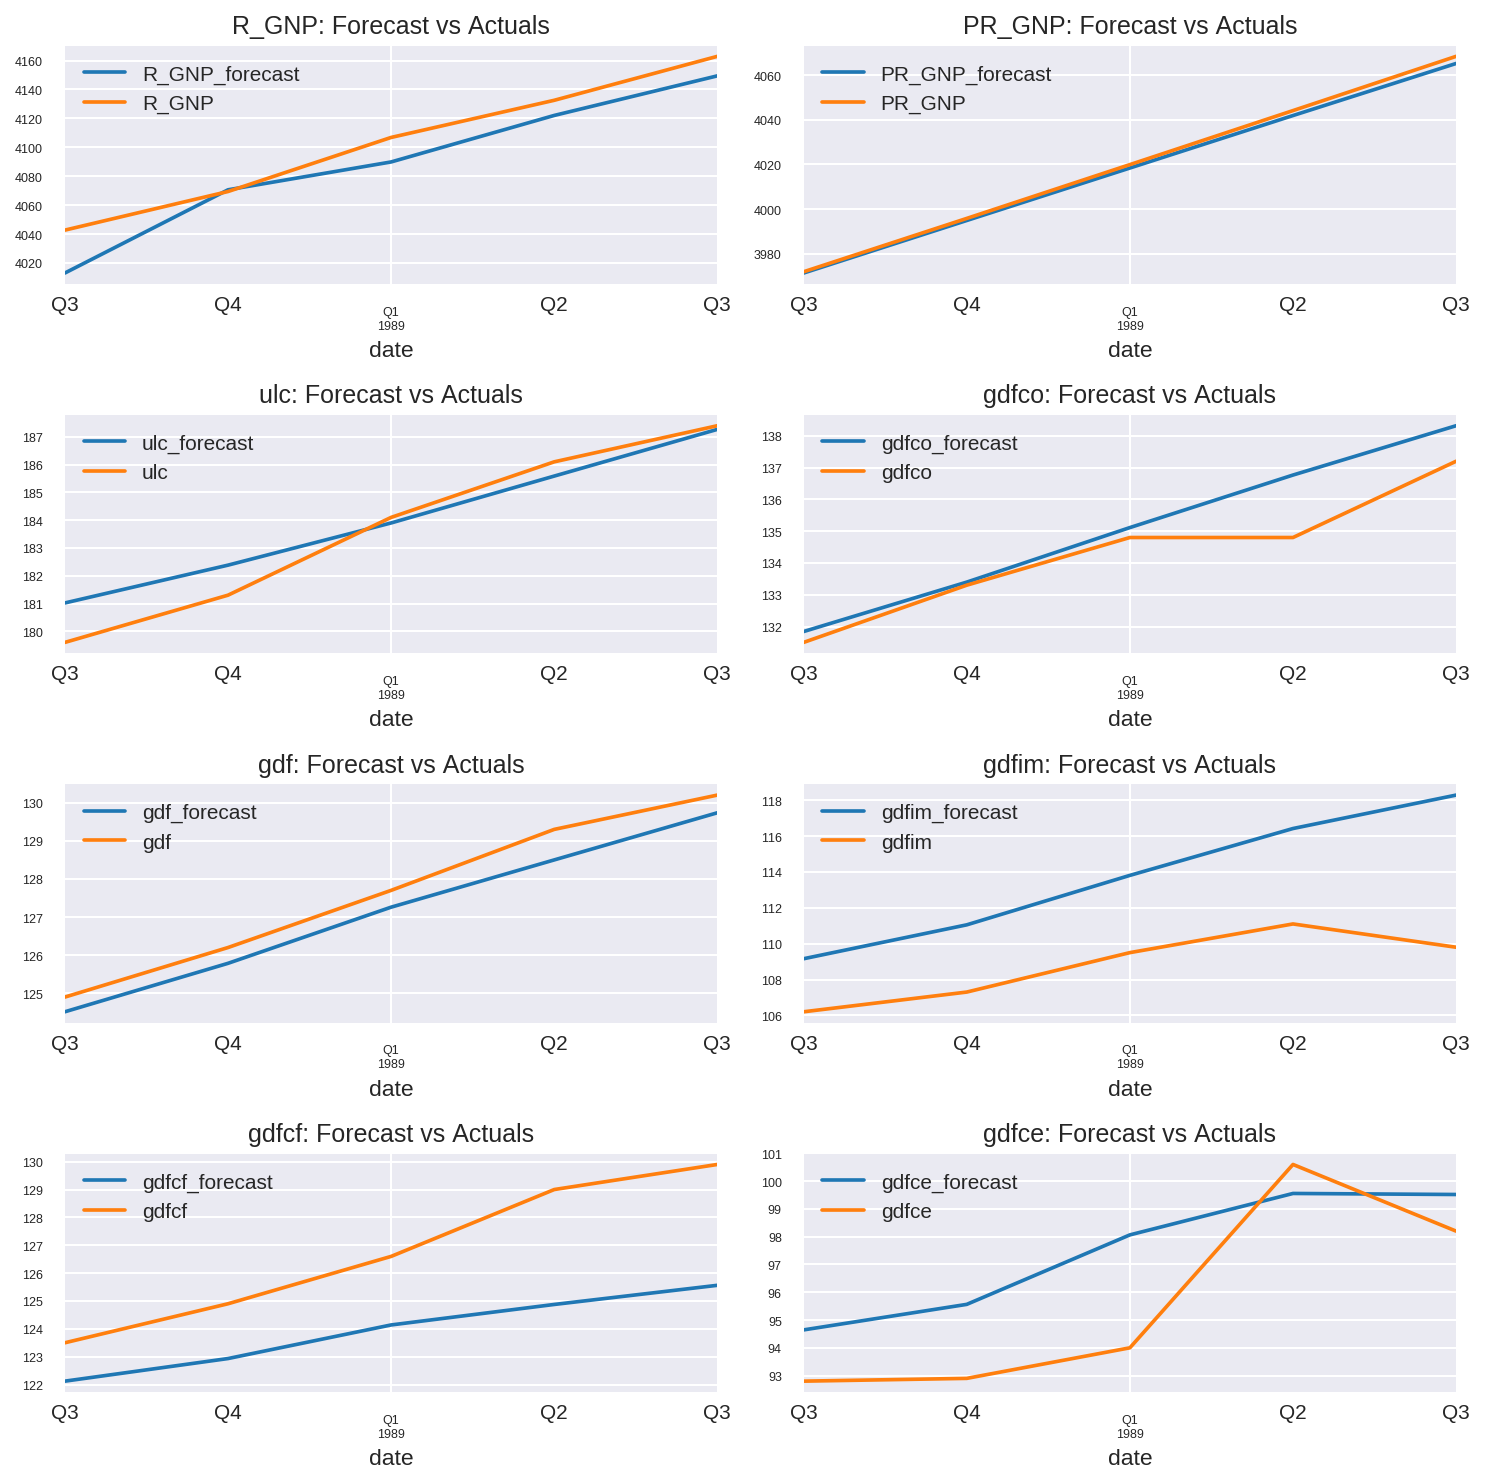

In [28]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-keep:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### ***Evaluation***


In [30]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})


print('Forecast Accuracy of: rgnp')
accuracy_prod = forecast_accuracy(df_results['R_GNP_forecast'].values, df_test['R_GNP'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: pgnp')
accuracy_prod = forecast_accuracy(df_results['PR_GNP_forecast'].values, df_test['PR_GNP'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: ulc')
accuracy_prod = forecast_accuracy(df_results['ulc_forecast'].values, df_test['ulc'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfco')
accuracy_prod = forecast_accuracy(df_results['gdfco_forecast'].values, df_test['gdfco'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdf')
accuracy_prod = forecast_accuracy(df_results['gdf_forecast'].values, df_test['gdf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfim')
accuracy_prod = forecast_accuracy(df_results['gdfim_forecast'].values, df_test['gdfim'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfcf')
accuracy_prod = forecast_accuracy(df_results['gdfcf_forecast'].values, df_test['gdfcf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfce')
accuracy_prod = forecast_accuracy(df_results['gdfce_forecast'].values, df_test['gdfce'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: rgnp
mape   :  0.0035
me     :  -13.881
mae    :  14.3548
mpe    :  -0.0034
rmse   :  17.094
corr   :  0.9784
minmax :  0.0035

Forecast Accuracy of: pgnp
mape   :  0.0004
me     :  -1.6864
mae    :  1.6864
mpe    :  -0.0004
rmse   :  1.9304
corr   :  1.0
minmax :  0.0004

Forecast Accuracy of: ulc
mape   :  0.0037
me     :  0.3313
mae    :  0.6691
mpe    :  0.0019
rmse   :  0.8373
corr   :  0.9902
minmax :  0.0037

Forecast Accuracy of: gdfco
mape   :  0.0057
me     :  0.7668
mae    :  0.7668
mpe    :  0.0057
rmse   :  1.033
corr   :  0.9656
minmax :  0.0056

Forecast Accuracy of: gdf
mape   :  0.0039
me     :  -0.501
mae    :  0.501
mpe    :  -0.0039
rmse   :  0.5236
corr   :  0.9977
minmax :  0.0039

Forecast Accuracy of: gdfim
mape   :  0.0455
me     :  4.9664
mae    :  4.9664
mpe    :  0.0455
rmse   :  5.3254
corr   :  0.8975
minmax :  0.0432

Forecast Accuracy of: gdfcf
mape   :  0.0223
me     :  -2.8533
mae    :  2.8533
mpe    :  -0.0223
rmse   :  3.0869
co

### Vector Autoregression Moving-Average (VARMA)
**VARMA** models the next step in each time series using the ARMA model. It is the generalization of ARMA to multiple parallel time series (ex. multivariate time series).

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.

The method is suitable for multivariate time series without trend and seasonal components.

In [31]:
from statsmodels.tsa.statespace.varmax import VARMAX

data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = (v1, v2)
    data.append(row)
# fit model
VARMA_model = VARMAX(data, order=(1, 1))
VARMA_results = VARMA_model.fit(disp=False)
# make prediction
predictions = VARMA_results.forecast()
print("VARMA Model Prediction: %s" % predictions)

/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


VARMA Model Prediction: [[0.30502712 0.8664771 ]]


/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


### Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
**VARMAX** is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [32]:
from statsmodels.tsa.statespace.varmax import VARMAX

data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]
# fit model
VARMAX_model = VARMAX(data, exog=data_exog, order=(1, 1))
VARMAX_results = VARMAX_model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
predictions = VARMAX_results.forecast(exog=data_exog2)
print("VARMAX Model Prediction: %s" % predictions)

/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


VARMAX Model Prediction: [[0.46757334 0.97743705]]


/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


### Simple Exponential Smoothing (SES)
**SES** models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components. We still have the seasonal component but let's apply it just to show what happens...

In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

data = [x + random() for x in range(1, 100)]
# fit model
SES_model = SimpleExpSmoothing(data)
SES_results = SES_model.fit()
# make prediction
predictions = SES_results.predict(len(data), len(data))
print("SES Model Prediction: %s" % predictions)

SES Model Prediction: [99.69322158]


### Holt Winter’s Exponential Smoothing (HWES)
**HWES** also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

Again, let's apply the method just to show the behaviour...

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = [x + random() for x in range(1, 100)]
HWES_model = ExponentialSmoothing(data)
HWES_results = HWES_model.fit()

# make prediction
predictions = HWES_results.predict(len(data), len(data))
print("HWES Model Prediction: %s" % predictions)

HWES Model Prediction: [99.09192371]
